## Import Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
##### 只有在colab上需要這幾行
#####

## Pandas Train Data

In [2]:

dataframe_train = pd.read_csv('../dataset/train_data-2018-09-29-2019-09-29.csv')
dataframe_train = dataframe_train.fillna(method='ffill')
del dataframe_train['Date']
dataframe_train.shape

(249, 21)

## Pandas Test Data

In [3]:
dataframe_pred = pd.read_csv('../dataset/predict_data-2019-09-30-2020-09-30.csv')
dataframe_pred = dataframe_pred.fillna(method='ffill')
del dataframe_pred['Date']
dataframe_pred.head()

,VFINX(t-1),TROW(t-1),AME(t-1),HON(t-1),DFS(t-1),ALL(t-1),ACN(t-1),ANSS(t-1),IEX(t-1),DOV(t-1),...,FMC(t-1),ADP(t-1),ADBE(t-1),PFG(t-1),VFC(t-1),J(t-1),TEL(t-1),KSU(t-1),OKE(t-1),VFINX
0,268.591461,109.611740,90.682549,164.163223,79.028282,105.616859,187.550476,217.089996,162.049942,98.304520,...,84.523018,156.606064,277.540009,54.648434,86.484261,89.724289,90.763832,131.210144,64.879303,269.957397
1,269.957397,110.794846,91.129158,165.296432,78.621056,106.449417,188.501068,221.360001,161.399963,97.744904,...,86.044113,157.572479,276.250000,54.429340,86.679070,90.525650,91.223969,131.695297,65.224487,266.665375
2,266.665375,108.040733,88.131889,160.402039,76.536522,104.970406,185.825699,216.729996,157.115768,94.514893,...,82.619225,156.606064,272.709991,52.562325,86.698547,88.566742,89.608604,127.734856,64.357071,261.889435
3,261.889435,105.752106,85.650688,157.363800,74.471375,103.442421,181.151154,216.039993,154.377853,92.374626,...,81.804710,152.886887,266.660004,51.162056,84.458275,86.954109,87.141510,125.328857,63.401146,264.041565
4,264.041565,106.217583,86.732491,157.793655,74.180504,103.481598,182.091919,220.240005,155.126343,92.845879,...,81.647697,153.784958,272.399994,50.828663,84.906326,87.241562,87.484161,125.784309,63.719784,267.795471


## Independent and identically distributed (I.I.D.) Testing

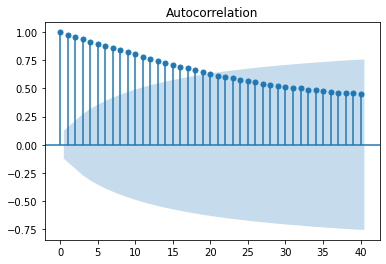

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(dataframe_train ['VFINX'].values, lags=40)
plt.show()

## 切割資料

In [5]:
train_A_d = dataframe_train[200:]
train_B_d = dataframe_train[:-200]
test_A_d = dataframe_pred[200:]
test_B_d = dataframe_pred[:-200]

## PCA降維

In [6]:
import numpy as np  
from sklearn.decomposition import PCA

pca = PCA(n_components=11)  

X = np.array(train_A_d) 
Y = np.array(train_B_d) 
Z = np.array(test_A_d)
W = np.array(test_B_d)

newData_0 = pca.fit_transform(X)
print(pca.explained_variance_ratio_) ## [1]

[0.46051318 0.35019361 0.08859025 0.02803887 0.01988974 0.01431408
 0.00988798 0.00860419 0.00612836 0.00363247 0.00254592]


In [7]:
newData_1 = pca.fit_transform(Y)
print(pca.explained_variance_ratio_)##[0] 

[0.76549842 0.08721099 0.07194661 0.0262374  0.01498615 0.01021785
 0.00639217 0.00518489 0.00326449 0.00207875 0.00166732]


In [8]:
newData_2 = pca.fit_transform(Z)
print(pca.explained_variance_ratio_) ##[0]

[8.03272077e-01 8.01759372e-02 5.89151885e-02 2.36838071e-02
 1.05695430e-02 5.93678382e-03 5.38590920e-03 3.72275843e-03
 2.78505472e-03 1.63453404e-03 7.89384604e-04]


In [9]:
newData_3 = pca.fit_transform(W)
print(pca.explained_variance_ratio_) ##[0]


[0.82490068 0.1104179  0.02527475 0.01204023 0.0073605  0.00636952
 0.00360476 0.0031115  0.00184947 0.00133084 0.00083453]


In [10]:
print(pca)
newData_0.shape
## 

PCA(n_components=11)


(49, 11)

## 獲得各主成分的方差

In [11]:
print(pca.explained_variance_ratio_) 
newData_0.shape

[0.82490068 0.1104179  0.02527475 0.01204023 0.0073605  0.00636952
 0.00360476 0.0031115  0.00184947 0.00133084 0.00083453]


(49, 11)

PCA

## Normalize test

In [12]:
from scipy import stats
print(stats.shapiro(newData_0[:,0]))

ShapiroResult(statistic=0.9416190385818481, pvalue=0.017106512561440468)


## Independent and identically distributed (I.I.D.) Testing

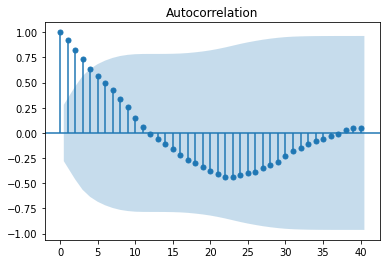

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(newData_0[:,0], lags=40)
plt.show()

## Min Max Scaler(資料切割)

In [14]:
from sklearn.preprocessing import MinMaxScaler

## train data
scaler = MinMaxScaler()
scaler = scaler.fit(newData_0)
scaled_train_dataA = scaler.fit_transform(newData_0)
scaled_train_dataA = Variable(torch.tensor(scaled_train_dataA).type(torch.FloatTensor))

scalers = MinMaxScaler()
scalers = scalers.fit(newData_1)
scaled_train_dataB = scaler.fit_transform(newData_1)
scaled_train_dataB = Variable(torch.tensor(scaled_train_dataB).type(torch.FloatTensor))

## Test Data

scalersTestA = MinMaxScaler()
scalersTestA = scalersTestA.fit(newData_2)
scaled_test_dataA = scalersTestA.fit_transform(newData_2)
scaled_test_dataA = Variable(torch.tensor(scaled_test_dataA).type(torch.FloatTensor))


scalersTestB = MinMaxScaler()
scalersTestB = scalersTestB.fit(newData_3)
scaled_test_dataB = scalersTestB.fit_transform(newData_3)
scaled_test_dataB = Variable(torch.tensor(scaled_test_dataB).type(torch.FloatTensor))

scaled_train_dataA[:,1].shape

torch.Size([49])

## Linear Model

In [15]:
import torch.nn as nn
losses = []
val_losses = []

model = nn.Sequential(torch.nn.Linear(1,1))
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
loss_function = torch.nn.MSELoss()

train = scaled_train_dataA[:,1].reshape(125,1)
train_b = scaled_train_dataB[:,0].reshape(125,1)

## train mode
model = model.train()

for epoch in range(0,100):
    prediction = model(train)
    loss = loss_function(prediction,train_b)
    val_loss = loss_function(prediction,train)
    losses.append(loss)
    val_losses.append(val_loss)
    optimizer.zero_grad()
    #loss.backward()
    val_loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        print(loss)
## eval mode
model = model.eval()

RuntimeError: shape '[125, 1]' is invalid for input of size 49

## Testing

In [ ]:
test = scaled_test_dataA[:,0].reshape(125,1)
test_b = scaled_test_dataB[:,0].reshape(125,1)

pred = model(test)

## Show Loss

In [ ]:
x_plot, = plt.plot(losses)
y_plot, = plt.plot(val_losses)
plt.legend([x_plot,y_plot],['loss','val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

## Draw Data(Scaler)

In [ ]:
plt.figure(figsize=(12,12))
x_plot, = plt.plot(test[:,0],test_b,'o')
y_plot, = plt.plot(test[:,0],pred.data,'o')
plt.legend([x_plot,y_plot],['data','pred'])
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
x_plot, = plt.plot(test_b)
y_plot, = plt.plot(pred.data,'g--')
plt.legend([x_plot,y_plot],['data','pred'])
plt.xlabel('data seq')
plt.ylabel('PCA[0]')
plt.show()

In [ ]:
#data1 = np.array(test_b)
#data2 = np.array(pred.data)
#print(data1.shape)
#for i in range(0,124):
  #data1[i] = data1[i] * (dataframe_pred['VFINX'].max() - scal.min_[10]) + scal.min_[10]
  #data2[i] = data2[i] * (dataframe_pred['VFINX'].max() - scal.min_[10]) + scal.min_[10]

#plt.figure(figsize=(15,12))
#x_plot, = plt.plot(data1,'magenta')
#y_plot, = plt.plot(data2, 'g--')
#plt.xlabel('data seq')
#plt.ylabel('vfinx')
#plt.legend([x_plot,y_plot],['data','pred'])
#plt.show()